# Спецификация к Лабораторной работе №11 

# Процедуры и функции. 
# Поиск экстремума среди трех значений
# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать две программы обработки трех двумерных массивов.

В первой версии программы использовать только процедуры общего вида. 

Во второй версии программы должна быть хотя бы одна функция. 

#### Условие: 
Найти сумму элементов для каждой из трех матриц.

Для каждой из матриц сформировать одномерный массив, 

равный по длине количеству строк матрицы и содержащий значения 0 или 1:

- 1, если в соответствующей строке элемент на главной диагонали больше других элементов этой строки;

- 0, если это условие для данной строки не выполняется.

Определить матрицу с максимальной суммой элементов.

### 2. Уточненная постановка задачи.
Даны матрицы $A, B, C$ с размерностями $n_A \times n_A, \ n_B \times n_B, \ n_C \times n_C$ .

Получить три массива $\{X_1, X_2, ..., X_{n_A}\}, \{X_1, X_2, ..., X_{n_B}\}, \{X_1, X_2, ..., X_{n_C}\}$ по правилу:
    
$\large{\displaystyle{X_i = \begin{cases}
1, \ Y_{ii} > Y_{ij}, \ \forall j: 0<j<n_Y+1 \land j \neq i\\
0, \ Y_{ii} \leq Y_{ij}, \ \exists j: 0<j<n_Y+1 \land j \neq i\\
\end{cases}, \ \forall i: 0<i<n_Y+1, \ \forall Y \in \{A, B, C\} \ (*)}}$.

Найти $\large{\displaystyle{S_Y = \sum_{\substack{0<i<n_Y+1 \\ 0<j<n_Y+1}} Y_{ij}, \ \forall Y \in \{A, B, C\} }}$.

Определить $\large{\displaystyle{\max_{Y \in \{A, B, C\}} S_Y }}$.

### 3. Пример с иллюстрацией.

In [1]:
from IPython.display import Image
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [3]:
def write_datatxt(file_name, A, B, C):
    with open(file_name, 'w') as f:
        for Y in [A, B, C]:
            f.write("{}\n".format(Y.shape[0]))
            for i in range(Y.shape[0]):
                f.write("{}\n".format(Y[i]))

In [9]:
A1 = numpy.random.randint(-100, 100, size=(5,5))
B1 = numpy.random.randint(-100, 100, size=(4,4))
C1 = numpy.random.randint(-100, 100, size=(5,5))
print('\n', A1, '\n\n', B1, '\n\n', C1)
write_datatxt('ABC_Lab11_1.txt', A1, B1, C1)


 [[ 39  59  35 -85  64]
 [-51  80 -18  54  22]
 [ 73  76  83  57 -30]
 [-13 -83 -72 -53 -82]
 [-16  69  54 -68  76]] 

 [[-81  -1  57  61]
 [  7  51  28 -81]
 [ 97 -71  98 -35]
 [  5 -15 -85  75]] 

 [[  4  15 -66 -76  90]
 [-29  -2  49 -20 -35]
 [ 84 -56 -83 -58 -69]
 [-14 -67 -16  15 -56]
 [ 84 -16  17 -35 -61]]


In [10]:
A2 = numpy.random.randint(0, 2, size=(3,3))
B2 = numpy.random.randint(0, 2, size=(4,4))
C2 = numpy.random.randint(0, 2, size=(3,3))
print('\n', A2, '\n\n', B2, '\n\n', C2)
write_datatxt('ABC_Lab11_2.txt', A2, B2, C2)


 [[0 0 1]
 [0 0 1]
 [0 1 1]] 

 [[0 0 1 0]
 [0 1 1 1]
 [0 1 0 0]
 [0 1 0 0]] 

 [[1 0 0]
 [0 0 1]
 [1 0 0]]


In [11]:
A3 = numpy.random.randint(0, 10, size=(3,3))
B3 = numpy.random.randint(0, 10, size=(4,4))
C3 = numpy.random.randint(0, 10, size=(3,3))
print('\n', A3, '\n\n', B3, '\n\n', C3)
write_datatxt('ABC_Lab11_3.txt', A3, B3, C3)


 [[2 0 9]
 [9 3 9]
 [2 6 2]] 

 [[5 9 4 9]
 [8 8 2 7]
 [6 5 5 8]
 [1 3 5 1]] 

 [[3 3 1]
 [5 4 8]
 [4 5 5]]


In [12]:
A4 = numpy.random.randint(-10, 0, size=(3,3))
B4 = numpy.random.randint(-10, 0, size=(4,4))
C4 = numpy.random.randint(-10, 0, size=(3,3))
print('\n', A4, '\n\n', B4, '\n\n', C4)
write_datatxt('ABC_Lab11_4.txt', A4, B4, C4)


 [[ -4  -6  -3]
 [ -9  -3  -2]
 [-10  -2  -3]] 

 [[ -3  -6  -6 -10]
 [ -1  -3  -6  -8]
 [ -6  -4  -2  -9]
 [ -7  -1  -4  -9]] 

 [[ -9  -4  -9]
 [ -5  -7  -5]
 [ -9 -10  -4]]


In [13]:
A5 = numpy.random.randint(-10, 10, size=(3,3))
B5 = numpy.random.randint(-10, 10, size=(4,4))
C5 = numpy.random.randint(-10, 10, size=(3,3))
print('\n', A5, '\n\n', B5, '\n\n', C5)
write_datatxt('ABC_Lab11_5.txt', A5, B5, C5)


 [[-6  1 -9]
 [ 8 -9  5]
 [-3 -4 -7]] 

 [[-3 -7 -5  4]
 [-4 -7 -8  0]
 [-7  9 -3 -1]
 [-1 -4 -9 -4]] 

 [[ 3  2 -1]
 [ 5 -7  2]
 [-2 -4 -6]]


In [14]:
# Версия 1
print(20*' ' + 'Лаб.11\n' + 90*'=')

fin = str(input('Текстовый файл с элементами исходных матриц: '))
fout = str(input('Текстовый файл с элементами исходных матриц и результатами: '))
                
with open(fin, 'r') as f:
    Y = f.readlines()
NA = int(Y[0]); NB = int(Y[NA+1]); NC = int(Y[NA+NB+2])
A = [x[1:-2].split() for x in Y[1:NA+1]]
A = [[int(x) for x in A[i]] for i in range(NA)]
B = [x[1:-2].split() for x in Y[NA+2:NA+NB+2]]
B = [[int(x) for x in B[i]] for i in range(NB)]
C = [x[1:-2].split() for x in Y[NA+NB+3:]]
C = [[int(x) for x in C[i]] for i in range(NC)]
N = [NA, NB, NC]; Y = [A, B, C]; L = ['A', 'B', 'C']

X, S = 3 * [[0]], 3 * [0]
for k in range(3):
    X[k] = [int(sum([int(Y[k][j][i] < Y[k][i][i]) \
            for j in range(len(Y[k][i]))]) == len(Y[k]) - 1) \
            for i in range(len(Y[k]))]
    S[k] = sum([sum(Y[k][i]) for i in range(len(Y[k]))])
K = S.index(max(S))

print(90*'=' + '\n')
for i in range(3):
    print('Матрица ', L[i], ': \n')
    for j in range(N[i]):
        print(Y[i][j])
    print('\n' + 'Массив X{}: \n'.format(L[i]))
    print(X[i])
    print('\n' + 'Сумма элементов S{}: {}\n'.format(L[i], S[i]))
    print(90*'=' + '\n')
print('\n' + 'Матрица с максимальной суммой элементов: {}\n'.format(L[K]))

with open(fout, 'w') as f:        
    for i in range(3):
        f.write("{}\n".format(N[i]))
        for j in range(len(Y[i])):
            f.write("{}\n".format(Y[i][j]))
        f.write("{}\n".format(X[i]))
        f.write("{}\n".format(S[i]))     
    f.write("{}\n".format(L[K]))

                    Лаб.11
Текстовый файл с элементами исходных матриц: ABC_Lab11_1.txt
Текстовый файл с элементами исходных матриц и результатами: ABCXS_Lab11_1.txt

Матрица  A : 

[39, 59, 35, -85, 64]
[-51, 80, -18, 54, 22]
[73, 76, 83, 57, -30]
[-13, -83, -72, -53, -82]
[-16, 69, 54, -68, 76]

Массив XA: 

[0, 1, 1, 0, 1]

Сумма элементов SA: 270


Матрица  B : 

[-81, -1, 57, 61]
[7, 51, 28, -81]
[97, -71, 98, -35]
[5, -15, -85, 75]

Массив XB: 

[0, 1, 1, 1]

Сумма элементов SB: 110


Матрица  C : 

[4, 15, -66, -76, 90]
[-29, -2, 49, -20, -35]
[84, -56, -83, -58, -69]
[-14, -67, -16, 15, -56]
[84, -16, 17, -35, -61]

Массив XC: 

[0, 0, 0, 1, 0]

Сумма элементов SC: -401



Матрица с максимальной суммой элементов: A



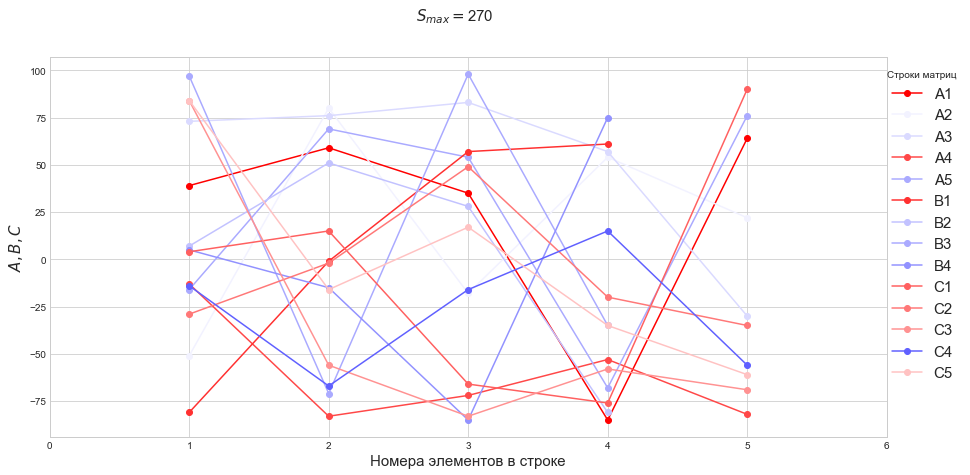

In [71]:
pylab.figure(figsize=(15,7))
bwr = pylab.cm.get_cmap('bwr_r')

for i in range(3):
    for j in range(N[i]):
        pylab.plot(range(len(Y[i][j])), Y[i][j], '-o', 
                   c=bwr((10*X[i][j]+2*i+j)/21),label=L[i]+str(j+1))
        
pylab.suptitle(r'$S_{max} = $' + str(max(S)), fontsize=15)
pylab.xlabel('Номера элементов в строке', fontsize=15) 
pylab.ylabel(r'$A, B, C$', fontsize=15)
pylab.xticks(range(-1, max(N)+1), range(max(N)+2));
pylab.legend(title='Строки матриц', fontsize=15, shadow=True, 
             bbox_to_anchor=(1.1,1.0));

In [76]:
# Версия 2
print(20*' ' + 'Лаб.11\n' + 90*'=')

fin = str(input('Текстовый файл с элементами исходных матриц: '))
fout = str(input('Текстовый файл с элементами исходных матриц и результатами: '))
                
def read_txt(file_name):
    with open(file_name, 'r') as f:
        Y = f.readlines()
    NA = int(Y[0]); NB = int(Y[NA+1]); NC = int(Y[NA+NB+2])
    A = [x[1:-2].split() for x in Y[1:NA+1]]
    A = [[int(x) for x in A[i]] for i in range(NA)]
    B = [x[1:-2].split() for x in Y[NA+2:NA+NB+2]]
    B = [[int(x) for x in B[i]] for i in range(NB)]
    C = [x[1:-2].split() for x in Y[NA+NB+3:]]
    C = [[int(x) for x in C[i]] for i in range(NC)]
    N = [NA, NB, NC]; Y = [A, B, C]; L = ['A', 'B', 'C']
    return N, Y, L
                
def find_XSK(Y):
    X, S = 3 * [[0]], 3 * [0]
    for k in range(3):
        X[k] = [int(sum([int(Y[k][j][i] < Y[k][i][i]) \
               for j in range(len(Y[k][i]))]) == len(Y[k]) - 1) \
               for i in range(len(Y[k]))]
        S[k] = sum([sum(Y[k][i]) for i in range(len(Y[k]))])
    K = S.index(max(S))
    return X, S, K

def write_txt(file_name, N, Y, L, X, S, K):
    with open(file_name, 'w') as f:        
        for i in range(3):
            f.write("{}\n".format(N[i]))
            for j in range(len(Y[i])):
                f.write("{}\n".format(Y[i][j]))
            f.write("{}\n".format(X[i]))
            f.write("{}\n".format(S[i]))     
        f.write("{}\n".format(L[K]))

N, Y, L = read_txt(fin)
X, S, K = find_XSK(Y)

print(90*'=' + '\n')
for i in range(3):
    print('Матрица ', L[i], ': \n')
    for j in range(N[i]):
        print(Y[i][j])
    print('\n' + 'Массив X{}: \n'.format(L[i]))
    print(X[i])
    print('\n' + 'Сумма элементов S{}: {}\n'.format(L[i], S[i]))
    print(90*'=' + '\n')
print('\n' + 'Матрица с максимальной суммой элементов: {}\n'.format(L[K]))  

write_txt(fout, N, Y, L, X, S, K)

                    Лаб.11
Текстовый файл с элементами исходных матриц: ABC_Lab11_5.txt
Текстовый файл с элементами исходных матриц и результатами: ABCXS_Lab11_5.txt

Матрица  A : 

[-6, 1, -9]
[8, -9, 5]
[-3, -4, -7]

Массив XA: 

[0, 0, 0]

Сумма элементов SA: -24


Матрица  B : 

[-3, -7, -5, 4]
[-4, -7, -8, 0]
[-7, 9, -3, -1]
[-1, -4, -9, -4]

Массив XB: 

[0, 0, 1, 0]

Сумма элементов SB: -50


Матрица  C : 

[3, 2, -1]
[5, -7, 2]
[-2, -4, -6]

Массив XC: 

[0, 0, 0]

Сумма элементов SC: -8



Матрица с максимальной суммой элементов: C



### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива B | символ | строка | "+XX.txt" |
| входные данные | fout | название текстового файла с элементами массива B | символ | строка | "+XX.txt" |
| входные данные | A,B,C | вводимые из текстового файла исходные матрицы | цел | двумерные массивы | +XX (:5) |
| выходные данные | XA, XB, XC | выводимые в текстовый файл сформированные массивы | цел | одномерные массивы | +XX (:5) |
| выходные данные | SA, SB, SC | выводимые в текстовый файл суммы элементов матриц | цел | простые переменные | +XX (:5) |
| выходные данные | M | выводимое в текстовый файл обозначение матрицы с максимальной суммой элементов | символ | строка | "X" |
| промежуточные данные | i | индекс текущей строки, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | j | индекс текущего столбца, 1≤j≤50 | цел | простая переменная | --- |
| промежуточные данные | MAX1 | максимальный элемент в строке не на главной диагонали | цел | простая переменная | --- |
| промежуточные данные | MAX2 | элемент в строке на главной диагонали | цел | простая переменная | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_

### 5. Входная форма
- обр 1.1 Текстовый файл с элементами исходных матриц: $<fin>$       
- обр 1.2 Текстовый файл с элементами исходных матриц и результатами: $<fout>$
- обр 2.1 Исходная матрица A:                 | Сформированный массив XA:
- обр 2.2 $ < A[11] >  < A[12] >  …  < A[1n] > \\ ... \\ < A[n1] >  < A[n2] >  …  < A[nn] >$    
- обр 3.1 Исходная матрица B:                 | Сформированный массив XB:
- обр 3.2 $ < B[11] >  < B[12] >  …  < B[1n] > \\ ... \\ < B[n1] >  < B[n2] >  …  < B[nn] >$
- обр 4.1 Исходная матрица C:                 | Сформированный массив XC:
- обр 4.2 $ < C[11] >  < C[12] >  …  < C[1n] > \\ ... \\ < C[n1] >  < C[n2] >  …  < C[nn] >$


### 6. Выходная форма
- обр 5 Лаб. 11
- обр 6.1 Текстовый файл с элементами исходных матриц: $<fin>$       
- обр 6.2 Текстовый файл с элементами исходных матриц и результатами: $<fout>$
- обр 7.1 Исходная матрица A:                 | Сформированный массив XA:
- обр 7.2 $ < A[11] >  < A[12] >  …  < A[1n] > | <XA[1] \\ ... \\ < A[n1] >  < A[n2] >  …  < A[nn] > | <XA[n]$
- обр 7.3 Сумма элементов матрицы A: $ < SA > $
- обр 8.1 Исходная матрица B:              | Сформированный массив XB:
- обр 8.2 $ < B[11] >  < B[12] >  …  < B[1n] > | <XB[1] \\ ... \\ < B[n1] >  < B[n2] >  …  < B[nn] > | <XB[n]$
- обр 8.3 Сумма элементов матрицы B: $ < SB > $
- обр 9.1 Исходная матрица C:                 | Сформированный массив XC:
- обр 9.2 $ < C[11] >  < C[12] >  …  < C[1n] > | <XC[1] \\ ... \\ < C[n1] >  < C[n2] >  …  < C[nn] > | <XC[n]$
- обр 9.3 Сумма элементов матрицы C: $ < SC > $
- обр 10 Матрица с максимальной суммой элементов: $ < M > $

### 7. Аномалии

-

### 8. Функциональные тесты

| Исходные данные | - | - | - | - | Результаты | - | - | - | - | - | - | Тест |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| fin | fout | A | B | C | XA | XB | XC | SA | SB | SC | M | № |
| ABC_Lab11_1.txt | ABCXS_Lab11_1.txt | `[[39, 59, 35, -85, 64] [-51, 80, -18, 54, 22] [73, 76, 83, 57, -30] [-13, -83, -72, -53, -82] [-16, 69, 54, -68, 76]]` | `[-81, -1, 57, 61] [7, 51, 28, -81] [97, -71, 98, -35] [5, -15, -85, 75]` | `[4, 15, -66, -76, 90] [-29, -2, 49, -20, -35] [84, -56, -83, -58, -69] [-14, -67, -16, 15, -56] [84, -16, 17, -35, -61]` | `[0, 1, 1, 0, 1]` | `[0, 1, 1, 1]` | `[0, 0, 0, 1, 0]` | 270 | 110 | -401 | `A` | 1 | 
| - | - | - | - | - | - | - | - | - | - | - | - | - |
| ABC_Lab11_2.txt | ABCXS_Lab11_2.txt | `[0, 0, 1] [0, 0, 1] [0, 1, 1]` | `[0, 0, 1, 0] [0, 1, 1, 1] [0, 1, 0, 0] [0, 1, 0, 0]` | `[1, 0, 0] [0, 0, 1] [1, 0, 0]` | `[0, 0, 0]` | `[0, 0, 0, 0]` | `[0, 0, 0]` | 4 | 6 | 3 | `B` | 2 |
| - | - | - | - | - | - | - | - | - | - | - | - | - |
| ABC_Lab11_3.txt | ABCXS_Lab11_3.txt | `[2, 0, 9] [9, 3, 9] [2, 6, 2]` | `[5, 9, 4, 9] [8, 8, 2, 7] [6, 5, 5, 8] [1, 3, 5, 1]` | `[3, 3, 1] [5, 4, 8] [4, 5, 5]` |  `[0, 0, 0]` | `[0, 0, 0, 0]` | `[0, 0, 0]` | 42 | 86 | 38 | `B` | 3 |
| - | - | - | - | - | - | - | - | - | - | - | - | - |
| ABC_Lab11_4.txt | ABCXS_Lab11_4.txt | `[-4, -6, -3] [-9, -3, -2] [-10, -2, -3]` | `[-3, -6, -6, -10] [-1, -3, -6, -8] [-6, -4, -2, -9] [-7, -1, -4, -9]` | `[-9, -4, -9] [-5, -7, -5] [-9, -10, -4]` | `[1, 0, 0]` | `[0, 0, 1, 0]` | `[0, 0, 1]` | -42 | -85 | -62 | `A` | 4 |
| - | - | - | - | - | - | - | - | - | - | - | - | - |
| ABC_Lab11_5.txt | ABCXS_Lab11_5.txt | `[-6, 1, -9] [8, -9, 5] [-3, -4, -7]` | `[-3, -7, -5, 4] [-4, -7, -8, 0] [-7, 9, -3, -1] [-1, -4, -9, -4]` | `[3, 2, -1] [5, -7, 2] [-2, -4, -6]` | `[0, 0, 0]` | `[0, 0, 1, 0]` | `[0, 0, 0]` | -24 | -50 | -8 | `C` | 5 |
| - | - | - | - | - | - | - | - | - | - | - | - | - |

| № теста | Входные  данные | - | - | - | - | Ожидаемый результат | - | - | - | - | - | - | Смысл теста |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| - | - | - | - | - | - | - | - | - | - | - | - | - | - | 
| 1 | fin = `ABC_Lab11_1.txt` | fout = `ABCXS_Lab11_1.txt` | A = `[[39, 59, 35, -85, 64] [-51, 80, -18, 54, 22] [73, 76, 83, 57, -30] [-13, -83, -72, -53, -82] [-16, 69, 54, -68, 76]]` | B = `[-81, -1, 57, 61] [7, 51, 28, -81] [97, -71, 98, -35] [5, -15, -85, 75]` | C = `[4, 15, -66, -76, 90] [-29, -2, 49, -20, -35] [84, -56, -83, -58, -69] [-14, -67, -16, 15, -56] [84, -16, 17, -35, -61]` | XA = `[0, 1, 1, 0, 1]` | XB = `[0, 1, 1, 1]` | XC = `[0, 0, 0, 1, 0]` | SA = `270` | SB = `110` | SC = `-401` | M = `A` | Подтвердить правильность расчетов в случае широкого спектра положительных и отрицательных чисел |
| - | - | - | - | - | - | - | - | - | - | - | - | - | - |
| 2 | fin = `ABC_Lab11_2.txt` | fout = `ABCXS_Lab11_2.txt` | A = `[0, 0, 1] [0, 0, 1] [0, 1, 1]` | B = `[0, 0, 1, 0] [0, 1, 1, 1] [0, 1, 0, 0] [0, 1, 0, 0]` | C = `[1, 0, 0] [0, 0, 1] [1, 0, 0]` | XA = `[0, 0, 0]` | XB = `[0, 0, 0, 0]` | XC = `[0, 0, 0]` | SA = `4` | SB = `6` | SC = `3` | M = `B` | Протестировать простейший случай с бинарными значениями переменной |
| - | - | - | - | - | - | - | - | - | - | - | - | - | - |
| 3 | fin = `ABC_Lab11_3.txt` | fout = `ABCXS_Lab11_3.txt` | A = `[2, 0, 9] [9, 3, 9] [2, 6, 2]` | B = `[5, 9, 4, 9] [8, 8, 2, 7] [6, 5, 5, 8] [1, 3, 5, 1]` | C = `[3, 3, 1] [5, 4, 8] [4, 5, 5]` |  XA = `[0, 0, 0]` | XB = `[0, 0, 0, 0]` | XC = `[0, 0, 0]` | SA = `42` | SB = `86` | SC = `38` | M = `B` | Протестировать массив в узком диапазоне положительных чисел |
| - | - | - | - | - | - | - | - | - | - | - | - | - | - |
| 4 | fin = `ABC_Lab11_4.txt` | fout = `ABCXS_Lab11_4.txt` | A = `[-4, -6, -3] [-9, -3, -2] [-10, -2, -3]` | B = `[-3, -6, -6, -10] [-1, -3, -6, -8] [-6, -4, -2, -9] [-7, -1, -4, -9]` | C = `[-9, -4, -9] [-5, -7, -5] [-9, -10, -4]` | XA = `[1, 0, 0]` | XB = `[0, 0, 1, 0]` | XC = `[0, 0, 1]` | SA = `-42` | SB = `-85` | SC = `-62` | M = `A` | Протестировать массив в узком диапазоне отрицательных чисел |
| - | - | - | - | - | - | - | - | - | - | - | - | - | - |
| 5 | fin = `ABC_Lab11_5.txt` | fout = `ABCXS_Lab11_5.txt` | A = `[-6, 1, -9] [8, -9, 5] [-3, -4, -7]` | B = `[-3, -7, -5, 4] [-4, -7, -8, 0] [-7, 9, -3, -1] [-1, -4, -9, -4]` | C = `[3, 2, -1] [5, -7, 2] [-2, -4, -6]` | XA = `[0, 0, 0]` | XB = `[0, 0, 1, 0]` | XC = `[0, 0, 0]` | SA = `-24` | SB = `-50` | SC = `-8` | M = `C` | Подтвердить правильность расчетов в узком диапазоне положительных и отрицательных чисел |

| - | Результаты | № теста |
| :-: | :-: | :-: |
| - | - | - |
| M | Максимальная вычислительная нагрузка = 52 (сравнение) + 66 (суммирование) + 2 (сравнение) | 1 |
| - | Соответствует ожидаемым числовым значениям | - |
| M | Максимальная вычислительная нагрузка = 24 (сравнение) + 41 (суммирование) + 2 (сравнение) | 2 |
| - | Соответствует ожидаемым числовым значениям и легко подтверждается визуально | - |
| M | Максимальная вычислительная нагрузка = 24 (сравнение) + 41 (суммирование) + 2 (сравнение) | 3 |
| - | Соответствует ожидаемым числовым значениям и легко подтверждается визуально | - |
| M | Максимальная вычислительная нагрузка = 24 (сравнение) + 41 (суммирование) + 2 (сравнение) | 4 |
| - | Соответствует ожидаемым числовым значениям и легко подтверждается визуально | - |
| M | Максимальная вычислительная нагрузка = 24 (сравнение) + 41 (суммирование) + 2 (сравнение) | 5 |
| - | Соответствует ожидаемым числовым значениям| - |


### 9. Метод
Отделим ввод-вывод от обработки данных и разделим задачу на три подзадачи:

1. _Подзадача А 0.1._ Запросить названия текстовых файлов ввода-вывода, 

   считать из текстового файла ввода исходные данные (обр.1-4), 
   
   затем вывести их на экран (обр.5-9) для визуального подтверждения и записать в файл.

2. _Подзадача А 0.2._ Решение поставленной задачи: 
   
   _Версия 1_

   2.1. На основе введенных исходных данных (матриц $A, B, C$) с помощью процедур общего вида  
   
    - сформировать массивы $XA, XB, XC$ по правилу $(*)$,

    - найти суммы элементов для каждой из заданных матриц $SA, SB, SC$,
    
    - определить матрицу $M$ с максимальной суммой элементов.
    
   _Версия 2_ 
    
   2.2. Выполнить перечисленные в пункте 2.1 действия с использованием хотя бы одной функции.
   
    
3. _Подзадача А 0.3._ Ввести полученные результаты ($XA, XB, XC, SA, SB, SC, M$) 

   на экран (обр.7-10) и записать в файл вывода полученные результаты.

Ввод-вывод тривиален и представляет собой чисто техническую задачу. 

Для осуществления процесса ввода-вывода и обработки матриц потребуются промежуточные переменные: 

- `i` – индекс строки текущего элемента матрицы, 

- `j` - индекс столбца текущего элемента матрицы,

- `MAX1` - максимальный элемент в строке не на главной диагонали,

- `MAX2` - элемент в строке на главной диагонали.

Их следует добавить в таблицу данных. 

Алгоритм необходим только для обработка входных данных и расчета результата. 

### 10. Алгоритм

[Sample diagrams](http://blockdiag.com/en/blockdiag/examples.html#sample-diagrams)

In [12]:
%%file block_diagram

blockdiag {
    orientation = portrait;
    class start_end [shape = ellipse, fontsize = 15, color = lightskyblue];
    class input_out [shape = flowchart.input, fontsize = 15, width = 750, color = lightcyan];
    class main_box [shape = box, width = 500, height = 150, fontsize = 18];
    
    Начало -> 
    "Вывод заголовка по обр.5 на экран" -> "Ввод имен файлов по обр.1.1,1.2" -> 
    "Вывод имен файлов по обр.6.1,6.2 на экран" -> 
    "Процедура 1. \nВвод исходных матриц А,B,C" ->
    "Процедура 2. \nФормирование массивов \nXA,XB,XC" ->
    "Процедура 3. \nПодсчет сумм SA,SB,SC" ->
    "Процедура 4. \nОпределение матрицы M \nс максимальной суммой" ->
    "Процедура 5. \nВывод А,B,C,XA,XB,XC,SA,SB,SC,M \nна экран и в файл" ->
    Конец;

    Начало, Конец [class = "start_end"];
    "Вывод заголовка по обр.5 на экран" [class = "input_out"];
    "Ввод имен файлов по обр.1.1,1.2", "Вывод имен файлов по обр.6.1,6.2 на экран" [class = "input_out"];
    "Процедура 1. \nВвод исходных матриц А,B,C" [class = "main_box"];
    "Процедура 2. \nФормирование массивов \nXA,XB,XC" [class = "main_box"];
    "Процедура 3. \nПодсчет сумм SA,SB,SC" [class = "main_box"];
    "Процедура 4. \nОпределение матрицы M \nс максимальной суммой"[class = "main_box"];
    "Процедура 5. \nВывод А,B,C,XA,XB,XC,SA,SB,SC,M \nна экран и в файл" [class = "main_box"];
    
    "Вывод имен файлов по обр.6.1,6.2 на экран" -> 
    "Процедура 1. \nВвод исходных матриц А,B,C" [label = 'Вх. A,B,C', fontsize = 18];
    "Процедура 5. \nВывод А,B,C,XA,XB,XC,SA,SB,SC,M \nна экран и в файл" ->
    Конец [label = 'Вых. XA,XB,XC,SA,SB,SC,M', fontsize = 18];
}

Overwriting block_diagram


In [13]:
!blockdiag block_diagram

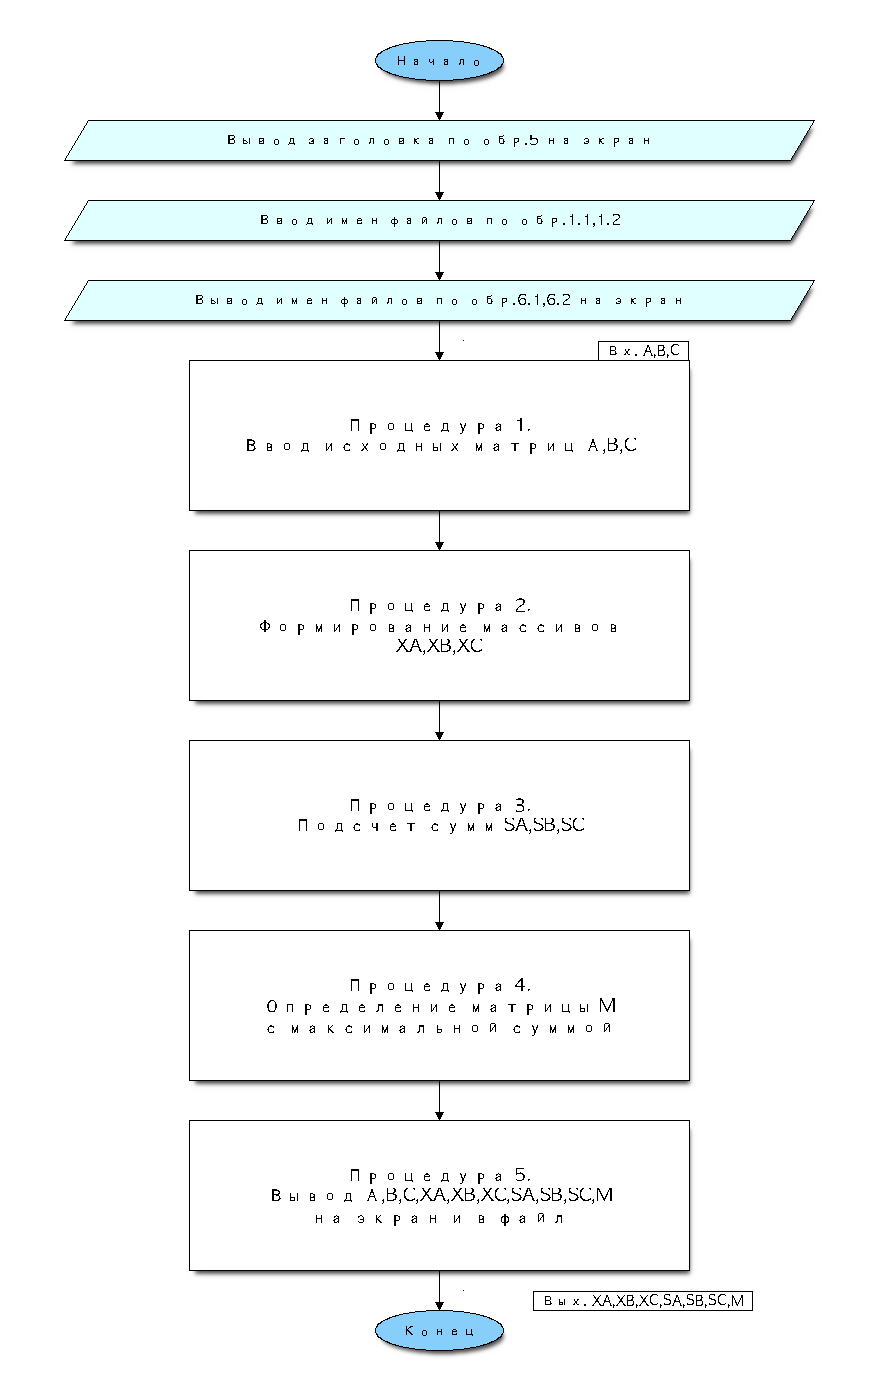

In [14]:
Image("block_diagram.png")

### 11. Программа на <i>Delphi</i>. 

__Диалоговый вариант {ввод названий файлов и данных из текстового файла, вывод на экран и в текстовый файл}__

Синтаксис:

[Pascal Tutorial](https://www.tutorialspoint.com/pascal/index.htm)

## Раскрытие абстракции А0.2
_Поскольку условие всей задачи совпадает (за исключением необходимости ввода-вывода) с условием выделенной подзадачи,_

_вместо полной спецификации с пунктами 1-11 выполнено просто дополнение к пунктам 9-11._

### 9. Метод
Пусть

- $i$ – номер текущей строки,

- $j$ – номер текущего столбца,

- $NA, NB, NC$ - количество строк и столбцов исходных матриц $A, B, C$,

- $A[i,j], B[i,j], C[i,j]$ – соответствующие элементы исходных матриц $A[NA \times NA], B[NB \times NB], C[NC \times NC]$,

- $XA, XB, XC$ - сформированные массивы для матриц $A, B, C$,

- $SA, SB, SC$ - суммы элементов соответствующих матриц $A, B, C$,

- $M$ - матрица с максимальной суммой.


_Процедура 1. (Абстракции А0.1)_

Исходные данные считываются из входного файла, сохраняются в виде матриц $A[NA \times NA], B[NB \times NB], C[NC \times NC]$, 

выводятся на экран и записываются в выходной файл с помощью циклов по строкам и столбцам.

Или выдается сообщение о некорректных данных.

_Процедура 2. (Абстракции А0.2)_

Сравниваются элементы матриц в каждой строке с элементом в этой строке на главной диагонали.

Формируются новые массивы $XA, XB, XC$.

_Процедура 3. (Абстракции А0.2)_

Суммирование элементов для каждой матрицы и сохранение результатов в виде переменных $SA, SB, SC$.

_Процедура 4. (Абстракции А0.2)_

Определение матрицы M с максимумальным значением суммы элементов.

_Процедура 5. (Абстракции А0.3)_

Сформированные массивы $XA, XB, XC$, суммы элементов $SA, SB, SC$ и обозначение матрицы $M$ с максимальной суммой 

выводятся на экран и записываются в файл с выходными данными.

### 10. Алгоритм

[Sample diagrams](http://blockdiag.com/en/blockdiag/examples.html#sample-diagrams)

#### Процедура 2

#### Процедура 3

#### Процедура 4

### 11. Программа на <i>Delphi</i>.
#### Программный код раскрытия абстракции.

__Диалоговый вариант {ввод названий файлов и данных из текстового файла, вывод на экран и в текстовый файл}__

Синтаксис:

[Pascal Tutorial](https://www.tutorialspoint.com/pascal/index.htm)

#### Вариант программы с именами файлов, заданными в качестве параметров.

#### Вариант программы для онлайн-компилятора.
[Compile and Execute Pascal Online](http://www.compileonline.com/compile_pascal_online.php)